# <span style="color:black"> Proyecto 4: Análisis de mercado inmobiliario</span>

En este peroyecto vamos a trabajar sobre los siguientes desafíos o nuevo objetivos: 

<span style="color:red"> Parte inicial:</span> Exploraremos el dataset, haremos su limpieza y tranformación de datos correspondientes

<span style="color:red"> Objetivo 1:</span> Mejorar el desempeño de machine Learning del proyecto 2, utilizando otro modelo que yo no había utilizado en la carrera, el XGboost. Para esto mejoraremos algunos pasos del preprocesamiento e incluiremos el dataset del 2020. 

<span style="color:red"> Objetivo 2:</span> Imaginamos un escenario en el que la empresa quiere analizar su performance y desempeño futuro en función de los ingresos por la publicación de propiedades. A más propiedades y a mayor precio publicado, mayor será la comisión. Supongamos que la empresa quiere conocer cómo será este crecimiento para Capital Federal, donde tiene pensado incorporar más promotores de ventas (por ejemplo). 
Además, analizar si existe alguna estacionalidad de cuándo se publican más propiedades para estar atentos a la demanda de trabajo en properati y a las oportunidades de mercado.

<span style="color:red"> Objetivo 3:</span> Explorar el histótico de 2019 y 2020 de los barrios más activos en Capital Federal para hacer un breve análisis del impacto de la pandemia en este sector. Éste será solamente para los fines del trabajo, ya que para sacar conclusiones de este tipo se necesitarían otros análisis, otras fuentes y otros tipos de estudio. 


Para esto realizaremos lo siguiente:

- Utilizaremos el dataset de Properaty que utilizamos en el Proyecto 2 que contiene los datos de 2019. 
- Bajaremos nueva información actualizada de Properati, los datos de 2020, y concatenaremos ambos datasets. 
- Mejoraremos la limpieza del nuevo dataset con los nuevos criterios.
- Usaremos un nuevo modelo de machine learning que no lo hemos visto mucho en la carrera y yo aún no lo había aplicado, el XGboost.
- Transformaremos el dataset a series de tiempo para hacer predicciones para el siguiente semestre. 
- Compararemos el comportamiento por barrios

## <span style="color:red">Parte Inicial: Exploramos, concatenamos y limpiamos el nuevo dataset</span>

### Exploración de ambos datasets

Hay pasos que no los voy a explicar para hacer más ágil la lectura, ya que han sido explicados en los trabajos anteriores. Sólo haré hincapié en aquellos procesos nuevos o que necesiten de explicación o justificación para su entendimiento.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
import datetime

Luego de importar las librerías, importo ambos datasets y los exploro

In [2]:
data2019 = pd.read_csv("DS_Proyecto_01_Datos_Properati.csv")
data2020 = pd.read_csv("ar_properties.csv")

In [3]:
data2019.info()
data2019.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146660 entries, 0 to 146659
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   start_date       146660 non-null  object 
 1   end_date         146660 non-null  object 
 2   created_on       146660 non-null  object 
 3   lat              136735 non-null  float64
 4   lon              136701 non-null  float64
 5   l1               146660 non-null  object 
 6   l2               146660 non-null  object 
 7   l3               146660 non-null  object 
 8   rooms            146660 non-null  float64
 9   bedrooms         146660 non-null  float64
 10  bathrooms        140703 non-null  float64
 11  surface_total    126133 non-null  float64
 12  surface_covered  125046 non-null  float64
 13  price            146660 non-null  float64
 14  currency         146660 non-null  object 
 15  title            146660 non-null  object 
 16  description      146660 non-null  obje

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta


In [4]:
data2020.info()
data2020.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 25 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   id               1000000 non-null  object 
 1   ad_type          1000000 non-null  object 
 2   start_date       1000000 non-null  object 
 3   end_date         1000000 non-null  object 
 4   created_on       1000000 non-null  object 
 5   lat              852776 non-null   float64
 6   lon              851594 non-null   float64
 7   l1               1000000 non-null  object 
 8   l2               1000000 non-null  object 
 9   l3               948105 non-null   object 
 10  l4               245262 non-null   object 
 11  l5               4987 non-null     object 
 12  l6               0 non-null        float64
 13  rooms            550568 non-null   float64
 14  bedrooms         488754 non-null   float64
 15  bathrooms        781920 non-null   float64
 16  surface_total    41

,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,l3,...,bathrooms,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type
0,H8ItFPip/c9ImYkz0rWYYQ==,Propiedad,2020-06-28,2020-07-13,2020-06-28,-34.598138,-58.416375,Argentina,Capital Federal,Palermo,...,NaN,520.0,NaN,NaN,NaN,Mensual,Terreno de 1 ambiente en Venta en Palermo,excelente ubicación lote 13 x 40 LFI 30 MTS -...,Lote,Venta
1,soDd3rgQYa2GAOupu0T4mg==,Propiedad,2020-06-28,2020-07-13,2020-06-28,-34.592727,-58.444872,Argentina,Capital Federal,Villa Crespo,...,NaN,186.0,NaN,NaN,NaN,Mensual,Terreno de 1 ambiente en Venta en Villa crespo,"Se deja constancia que las caracteristicas, me...",Lote,Venta
2,PjOFork1Wn++02Ode7n7dQ==,Propiedad,2020-06-28,2020-07-28,2020-06-28,-31.372353,-64.483223,Argentina,Córdoba,Villa Santa Cruz del Lago,...,NaN,980.0,NaN,NaN,NaN,Mensual,Villa Lago Azul Calle Pasteur 100 - Consulte ...,excelente oportunidad de invercion terreno de ...,Lote,Venta


In [5]:
mis_val2019 = data2019.isnull().sum()
mis_val2019

start_date             0
end_date               0
created_on             0
lat                 9925
lon                 9959
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64

In [6]:
mis_val2020 = data2020.isnull().sum()
mis_val2020

id                       0
ad_type                  0
start_date               0
end_date                 0
created_on               0
lat                 147224
lon                 148406
l1                       0
l2                       0
l3                   51895
l4                  754738
l5                  995013
l6                 1000000
rooms               449432
bedrooms            511246
bathrooms           218080
surface_total       588625
surface_covered     593126
price                40080
currency             41532
price_period        617685
title                    0
description             24
property_type            0
operation_type           0
dtype: int64

Investiguemos que valores toman los campos **property_type, l2 y l3**

In [7]:
print(data2019['property_type'].unique())
print(data2020['property_type'].unique())

['Departamento' 'PH' 'Casa' 'Lote' 'Casa de campo' 'Oficina' 'Otro'
 'Local comercial' 'Cochera' 'Depósito']
['Lote' 'Otro' 'Cochera' 'Oficina' 'Depósito' 'Departamento'
 'Local comercial' 'Casa' 'PH' 'Casa de campo']


In [8]:
print(data2019['l1'].unique())
print(data2020['l1'].unique())

['Argentina']
['Argentina' 'Uruguay' 'Estados Unidos' 'Brasil']


In [9]:
print(data2019["l2"].unique())
print(data2020['l2'].unique())

['Capital Federal' 'Bs.As. G.B.A. Zona Sur' 'Bs.As. G.B.A. Zona Norte'
 'Bs.As. G.B.A. Zona Oeste']
['Capital Federal' 'Córdoba' 'Colonia' 'Mendoza' 'Bs.As. G.B.A. Zona Sur'
 'Bs.As. G.B.A. Zona Norte' 'Buenos Aires Interior' 'La Pampa'
 'Buenos Aires Costa Atlántica' 'Maldonado' 'San Luis'
 'Bs.As. G.B.A. Zona Oeste' 'Tierra Del Fuego' 'Salta' 'Santa Fe'
 'Neuquén' 'Santa Cruz' 'Chubut' 'Canelones' 'Río Negro' 'Entre Ríos'
 'Tucumán' 'Florida' 'Montevideo' 'Chaco' 'São Paulo'
 'Santiago Del Estero' 'La Rioja' 'Misiones' 'San Juan' 'Corrientes'
 'Rocha' 'Maryland' 'Miami' 'Jujuy' 'Catamarca' 'Formosa' 'Michigan'
 'Pennsylvania' 'Rio Grande do Norte' 'Santa Catarina' 'Rio de Janeiro'
 'California' 'New York']


In [10]:
print(data2020["l3"].unique())
print(data2020['l4'].unique())
print(data2020["l5"].unique())
print(data2020['l6'].unique())

['Palermo' 'Villa Crespo' 'Villa Santa Cruz del Lago' ... 'Vilelas'
 'Anchorena' 'Parque Central']
[nan 'La Plata' 'Centro' ... 'Arroyo Dulce' 'Barrio La Juanita' 'Conesa']
[nan 'Enyoi' 'BarrioPortezuelo' 'Barrio Los Castores' 'Barrio El Yacht'
 'Barrio Los Lagos' 'Barrio La Isla' 'Barrio Las Caletas'
 'Barrio Las Glorietas' 'Barrio Los Alisos' 'Barrio Barrancas del Lago'
 'Barrio El Golf' 'Barrio La Alameda' 'Barrio Lagos del Golf 2'
 'Barrio Lagos del Golf 1' 'Barrio Los Sauces' 'Barrio Cabos del Lago'
 'Islas del Canal' 'Barrio Los Tilos' 'QBay Yacht'
 'Barrio Residencial Pacheco 2' 'Barrio Residencial Pacheco 1']
[nan]


In [11]:
print(data2020["price_period"].unique())
print(data2020['operation_type'].unique())
print(data2020["currency"].unique())

['Mensual' nan 'Semanal' 'Diario']
['Venta' 'Alquiler temporal' 'Alquiler']
[nan 'ARS' 'USD' 'UYU' 'PEN']


In [12]:
data2020["currency"].value_counts()

USD    749572
ARS    206863
UYU      1843
PEN       190
Name: currency, dtype: int64

### Concatenación el dataset

El dataset del 2020 resultó tener peculiaridades diferentes a las del 2019. En primer lugar, tiene nuevas instancias y además más variables de las que ya existían en 2019. Otro dato importante es que tiene valores faltantes en instancias que antes no tenía y yo había usado para imputar valores. En función de lo visto, deberemos hacer una nueva limpieza luego de concatenar.

Para seguir con el proyecto anterior, nos interesa sólo Argentina, y dentro de Argentina, sólo Capital Federal. Por lo que concateno filtrando l2 y el tipo de operación, que quiero sólo de Venta a los fines de este estudio.

Al concatenar, como tendré índices repetidos (data[data.index.duplicated()])), le agrego que me ignore los indexes

In [13]:
#Unimos los 3 datasets, podemos hacerlo asi directamente ya que tienen las mismas columnas
dataset = pd.concat([data2019, data2020], ignore_index=True)

#Nos quedamos solamente con la estación Illia y la forma de pago Efectivo
mask = np.logical_and(dataset.l2=="Capital Federal", dataset.operation_type == 'Venta')
dataset = dataset[mask]

In [14]:
dataset.head(3)

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,...,title,description,property_type,operation_type,id,ad_type,l4,l5,l6,price_period
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,...,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,...,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,...,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 273199 entries, 0 to 1146646
Data columns (total 25 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   start_date       273199 non-null  object 
 1   end_date         273199 non-null  object 
 2   created_on       273199 non-null  object 
 3   lat              243361 non-null  float64
 4   lon              243253 non-null  float64
 5   l1               273199 non-null  object 
 6   l2               273199 non-null  object 
 7   l3               254343 non-null  object 
 8   rooms            220100 non-null  float64
 9   bedrooms         197766 non-null  float64
 10  bathrooms        243452 non-null  float64
 11  surface_total    198024 non-null  float64
 12  surface_covered  193566 non-null  float64
 13  price            268861 non-null  float64
 14  currency         268468 non-null  object 
 15  title            273199 non-null  object 
 16  description      273199 non-null  obj

In [16]:
dataset["currency"].value_counts()

USD    267213
ARS      1255
Name: currency, dtype: int64

Decido sacarle los valores que no son dólares porque son los menos y no los voy a reemplazar por el tipo de cambio tan oscilante que tenemos, no hay referencias.

In [17]:
dataset = dataset[((dataset["currency"] == "USD"))]

In [18]:
print(dataset["currency"].unique())

['USD']


In [19]:
dataset["price_period"].value_counts()

Mensual    65616
Name: price_period, dtype: int64

Aunque siga la forma de pago mensual, lo voy a dejar así porque ya filtré por tipo de operación Venta. No debería haber acá esos valores mensuales.

Elimino valores duplicados y casos donde la superficie cubierta sea mayor a la total. Luego elimino las columnas que no voy a necesitar.

In [20]:
dataset.drop_duplicates(inplace = True)

In [21]:
dataset.drop(dataset[dataset["surface_covered"]>dataset["surface_total"]].index, inplace = True)

In [22]:
#Quitamos las columnas que no vamos a utilizar
dataset.drop(columns = ['l1','id','ad_type', 'lat', "lon", "l4", "l5", "l6", "currency","price_period", "title", "description", "operation_type" ], inplace = True)

dataset.head()

,start_date,end_date,created_on,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
0,2019-10-17,2019-12-23,2019-10-17,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,Departamento
1,2019-10-17,2019-11-21,2019-10-17,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,PH
2,2019-10-17,2019-11-01,2019-10-17,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,PH
3,2019-10-17,2019-12-23,2019-10-17,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,PH
5,2019-10-17,2019-11-01,2019-10-17,Capital Federal,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,PH


In [23]:
print(dataset["property_type"].unique())

['Departamento' 'PH' 'Casa' 'Lote' 'Oficina' 'Otro' 'Cochera'
 'Local comercial' 'Depósito' 'Casa de campo']


En función de lo aprendido el el proyecto 02, filtro para el tipo de propiedades que necesito, ya que he comprobado que no tengo suficientes datos de los otros tipos de propiedades.

In [24]:
data = dataset[((dataset["property_type"] == "Departamento") | (dataset["property_type"] == "PH") | (dataset["property_type"] == "Casa")) ]

In [25]:
data.shape

(216178, 12)

### Análisis y extracción de Valores Atípicos

Ahora comienzo con la extracción de valores atípicos

In [26]:
data.describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,207514.000000,188028.000000,207868.000000,173456.000000,174542.000000,2.161780e+05
mean,2.820648,1.972882,1.540396,114.068513,92.550635,2.479074e+05
std,1.361319,1.368988,0.863214,972.688022,769.612525,3.213575e+05
min,1.000000,0.000000,1.000000,10.000000,1.000000,0.000000e+00
25%,2.000000,1.000000,1.000000,47.000000,42.000000,1.100000e+05
50%,3.000000,2.000000,1.000000,69.000000,60.000000,1.650000e+05
75%,4.000000,3.000000,2.000000,110.000000,95.000000,2.650000e+05
max,35.000000,153.000000,20.000000,140380.000000,126062.000000,3.243423e+07


In [27]:
data["property_type"].value_counts()

Departamento    185137
PH               21082
Casa              9959
Name: property_type, dtype: int64

Text(0.5, 1.0, 'Precios según tipo de propiedad')

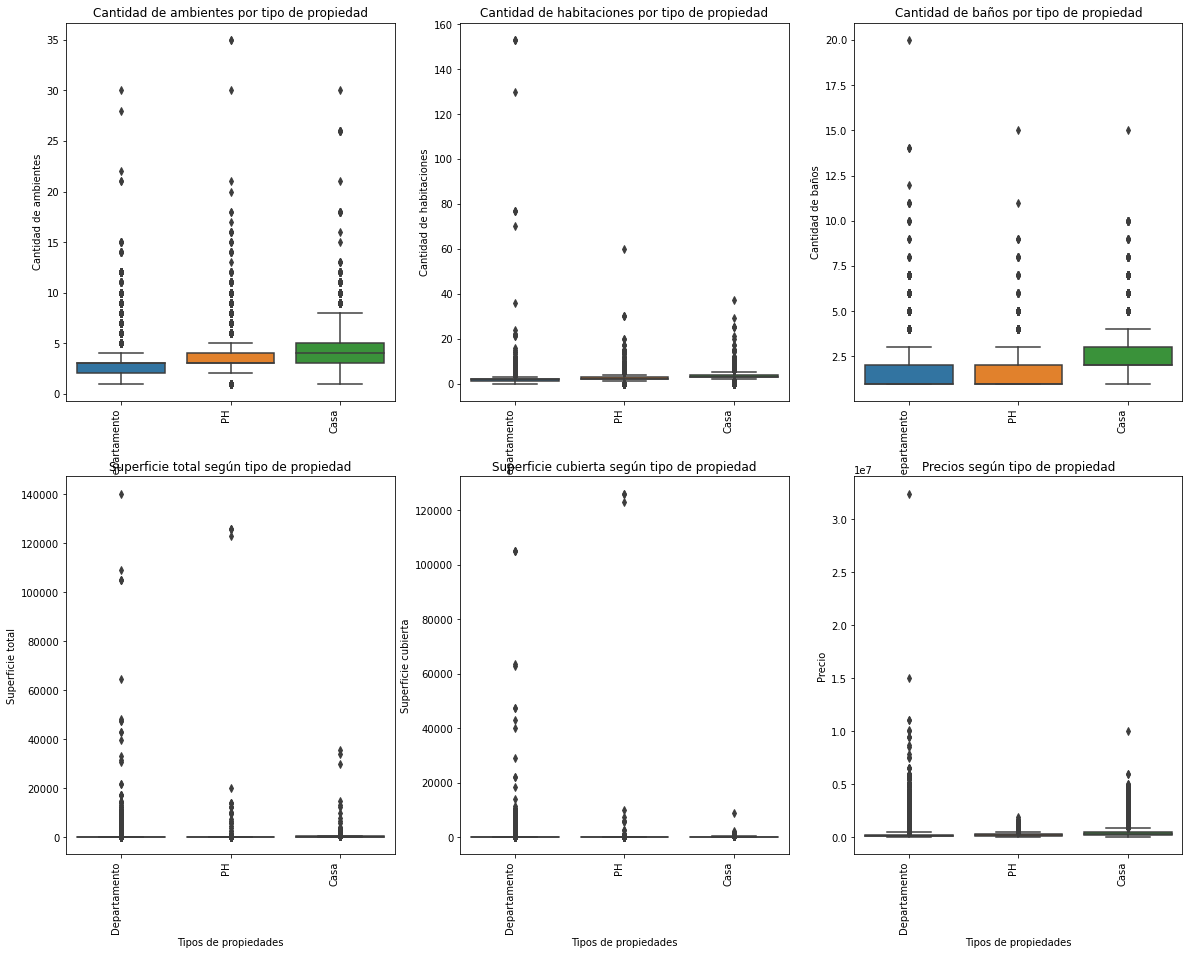

In [28]:
plt.figure(figsize = (20,15.3))
plt.subplot(2,3,1)
ax = sns.boxplot(data = data, x = "property_type", y = "rooms")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.xlabel('Tipos de propiedades')
plt.ylabel('Cantidad de ambientes')
plt.title('Cantidad de ambientes por tipo de propiedad')

plt.subplot(2,3,2)
ax2 = sns.boxplot(data = data, x = "property_type", y = "bedrooms")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="right")
plt.xlabel('Tipos de propiedades')
plt.ylabel('Cantidad de habitaciones')
plt.title('Cantidad de habitaciones por tipo de propiedad')

plt.subplot(2,3,3)
ax3 = sns.boxplot(data = data, x = "property_type", y = "bathrooms")
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=90, ha="right")
plt.xlabel('Tipos de propiedades')
plt.ylabel('Cantidad de baños')
plt.title('Cantidad de baños por tipo de propiedad')

plt.subplot(2,3,4)
ax4 = sns.boxplot(data = data, x = "property_type", y = "surface_total")
ax4.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.xlabel('Tipos de propiedades')
plt.ylabel('Superficie total')
plt.title('Superficie total según tipo de propiedad')

plt.subplot(2,3,5)
ax5 = sns.boxplot(data = data, x = "property_type", y = "surface_covered")
ax5.set_xticklabels(ax5.get_xticklabels(), rotation=90, ha="right")
plt.xlabel('Tipos de propiedades')
plt.ylabel('Superficie cubierta')
plt.title('Superficie cubierta según tipo de propiedad')

plt.subplot(2,3,6)
ax6 = sns.boxplot(data = data, x = "property_type", y = "price")
ax6.set_xticklabels(ax6.get_xticklabels(), rotation=90, ha="right")
plt.xlabel('Tipos de propiedades')
plt.ylabel('Precio')
plt.title('Precios según tipo de propiedad')

En el gráfico anterior encuentro mucho outliers, especialmente en las superficies y precio. Borro valores atípicos.

In [29]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum()

<ipython-input-29-192de805fea7>:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum()
<ipython-input-29-192de805fea7>:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum()


bathrooms           7761
bedrooms             747
created_on             0
end_date               0
l2                     0
l3                     0
price              17909
property_type          0
rooms               1400
start_date             0
surface_covered    13254
surface_total      13754
dtype: int64

In [30]:
data = data[~((data < (Q1 - 1.5*IQR)) | (data > (Q3 + 1.5*IQR))).any(axis=1)]
data.shape

<ipython-input-30-14f248a74fc7>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data = data[~((data < (Q1 - 1.5*IQR)) | (data > (Q3 + 1.5*IQR))).any(axis=1)]
<ipython-input-30-14f248a74fc7>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data = data[~((data < (Q1 - 1.5*IQR)) | (data > (Q3 + 1.5*IQR))).any(axis=1)]


(189893, 12)

El dataset se ha achicado considerablemente, ahora grafico la distribución de los valores que me quedaron

/Users/eugeniasandrone/opt/miniconda3/envs/datascience/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/eugeniasandrone/opt/miniconda3/envs/datascience/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/eugeniasandrone/opt/miniconda3/envs/datascience/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Plea

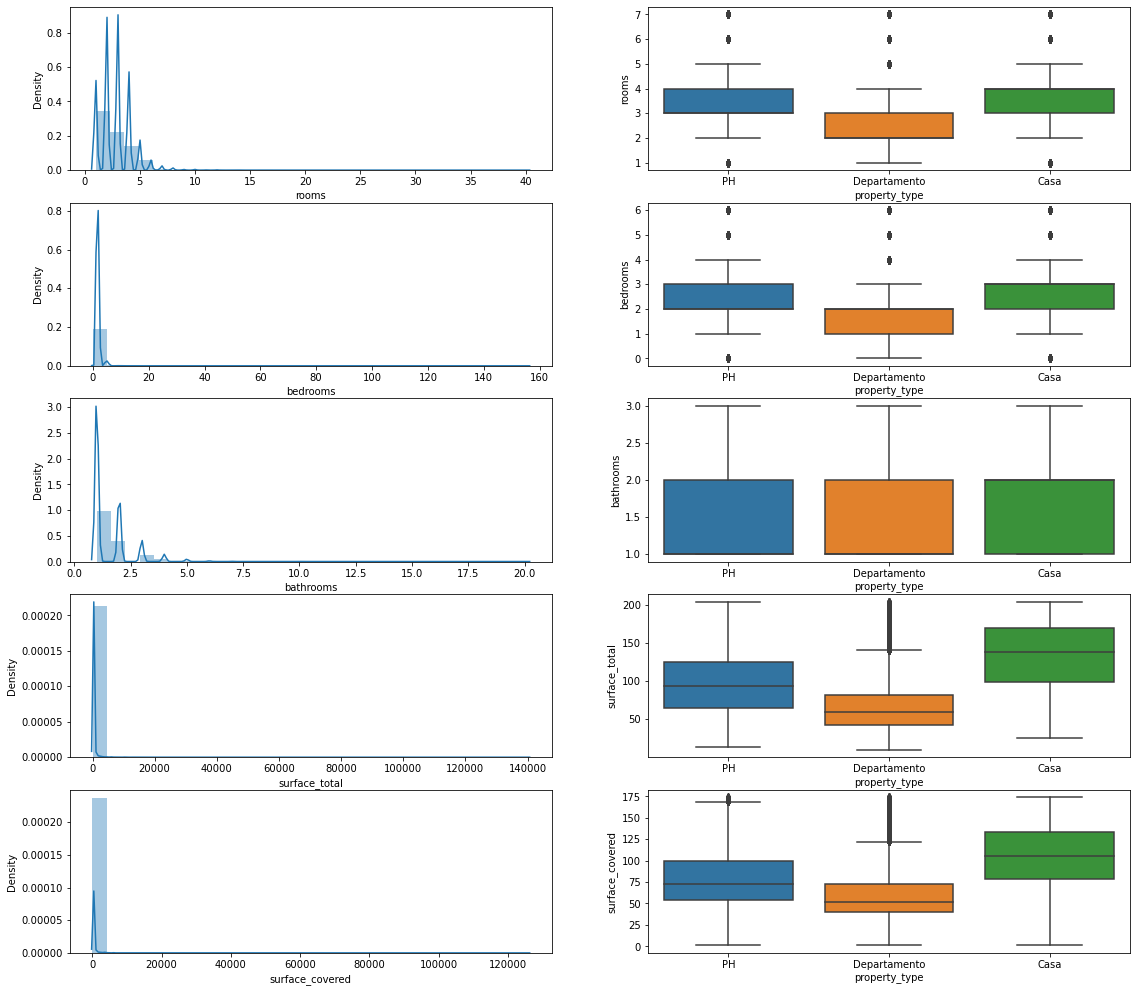

In [31]:
aux=1
plt.figure(figsize=(19,21))
for i in range(5,10):
    plt.subplot(6,2, aux)
    sns.distplot(dataset.iloc[:, i], bins=30)
    
    plt.subplot(6,2,aux+1)
    sns.boxplot(data= data, x='property_type', y=data.iloc[:, i])
    aux+=2

Conforme con el resultado, pasamos a los valores faltantes

### Análisis y tratamiento de Valores Faltantes

In [32]:
mis_val = data.isnull().sum()
mis_val

start_date             0
end_date               0
created_on             0
l2                     0
l3                  5306
rooms               6817
bedrooms           26210
bathrooms           7726
surface_total      39528
surface_covered    38757
price                  0
property_type          0
dtype: int64

Tengo muchos valores faltantes, por lo que analizo cómo se distribuyen los valores no faltantes en porcentaje por tipo de propiedad.

In [33]:
data["property_type"].value_counts(normalize = True)*100

Departamento    87.919513
PH               9.634373
Casa             2.446114
Name: property_type, dtype: float64

Antes de eliminar o imputar valores, analizo el mapa de correlación de las variables para ver si puedo reemplazar valores o utilizar las referencias de otras instancias.

Text(0.5, 1.0, 'Heatmap de correlación del variables')

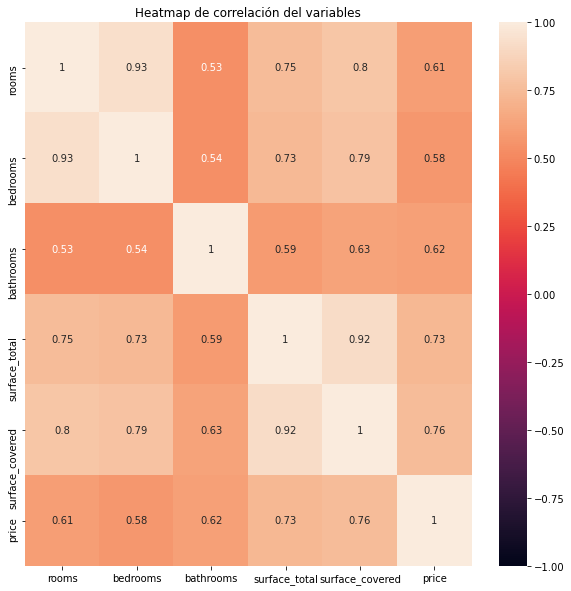

In [34]:
corr = data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, 
               xticklabels=corr.columns.values,
               yticklabels=corr.columns.values,
               vmin=-1,
               annot=True)
plt.title("Heatmap de correlación del variables")

Antes de proceder al análisis, genero un dataset de Valores Faltantes para ir comprobando la transofrmación en cada paso que doy.

In [35]:
data_VF = data.drop(['start_date', "end_date", "created_on", "l2"], axis=1)
data_VF.shape

(189893, 8)

In [36]:
mis_val_vf = data_VF.isnull().sum()
mis_val_vf

l3                  5306
rooms               6817
bedrooms           26210
bathrooms           7726
surface_total      39528
surface_covered    38757
price                  0
property_type          0
dtype: int64

Para reemplazar los datos, decido agrupar el dataset por tipo de propiedad, l3 y superficie cubierta ya que creo que son variables que, como vemos en la correlation map, ayudan a definir el precio.

In [37]:
glr = data.groupby(['property_type', 'l3',"surface_covered"])

In [38]:
glr.first() 

start_date    end_date  \
property_type l3               surface_covered                           
Casa          Abasto           40.0             2020-06-05  2020-07-03   
              Agronomía        61.0             2020-10-20  9999-12-31   
                               63.0             2020-03-18  2020-09-23   
                               70.0             2020-07-10  2020-08-28   
                               75.0             2020-07-28  2020-09-23   
...                                                    ...         ...   
PH            Villa del Parque 159.0            2019-01-13  2019-01-26   
                               160.0            2019-04-05  2019-06-23   
                               162.0            2020-01-25  2020-02-07   
                               165.0            2019-04-24  2019-06-23   
                               171.0            2019-11-14  2019-12-22   

                                                created_on               l2  \
property_type l3               surface_covered                                
Casa          Abasto           40.0             2020-06-05  Capital Federal   
              Agronomía        61.0             2020-10-20  Capital Federal   
                               63.0             2020-03-18  Capital Federal   
                               70.0             2020-07-10  Capital Federal   
                               75.0             2020-07-28  Capital Federal   
...                                                    ...              ...   
PH            Villa del Parque 159.0            2019-01-13  Capital Federal   
                               160.0            2019-04-05  Capital Federal   
                               162.0            2020-01-25  Capital Federal   
                               165.0            2019-04-24  Capital Federal   
                               171.0            2019-11-14  Capital Federal   

                                                rooms  bedrooms  bathrooms  \
property_type l3               surface_covered                               
Casa          Abasto           40.0               1.0       NaN        NaN   
              Agronomía        61.0               2.0       NaN        1.0   
                               63.0               2.0       NaN        1.0   
                               70.0               3.0       NaN        1.0   
                               75.0               3.0       NaN        2.0   
...                                               ...       ...        ...   
PH            Villa del Parque 159.0              3.0       2.0        1.0   
                               160.0              6.0       3.0        2.0   
                               162.0              5.0       3.0        2.0   
                               165.0              6.0       5.0        2.0   
                               171.0              3.0       2.0        1.0   

                                                surface_total     price  
property_type l3               surface_covered                           
Casa          Abasto           40.0                      40.0   45000.0  
              Agronomía        61.0                      61.0  150000.0  
                               63.0                     125.0  159900.0  
                               70.0                      70.0  150000.0  
                               75.0                     185.0  190000.0  
...                                                       ...       ...  
PH            Villa del Parque 159.0                    159.0  220000.0  
                               160.0                    160.0  224000.0  
                               162.0                    187.0  298000.0  
                               165.0                    165.0  110000.0  
                               171.0                    171.0  165000.0  

[9917 rows x 9 columns]

Podemos analizar los valores estadísticos de este agreupamiento por cada una de las columnas con valores faltantes, en este caso, con la variable badrooms. Así puedo decidir si reemplazo los valores faltantes con las variables estadísticas según el agrupamiento. Para no hacerlo tan extensivo, no escribo los agregados de todas las variables. Ya se que las reemplazaré con la median.

In [39]:
print(glr['bathrooms'].agg([np.median, np.mean, np.std, np.sum]))

                                                median  mean  std   sum
property_type l3               surface_covered                         
Casa          Abasto           40.0                NaN   NaN  NaN   0.0
              Agronomía        61.0                1.0  1.00  NaN   1.0
                               63.0                1.0  1.00  NaN   1.0
                               70.0                1.0  1.00  NaN   1.0
                               75.0                2.0  2.00  NaN   2.0
...                                                ...   ...  ...   ...
PH            Villa del Parque 159.0               1.0  1.00  0.0   3.0
                               160.0               2.0  2.00  NaN   2.0
                               162.0               2.0  2.00  NaN   2.0
                               165.0               2.0  2.00  0.0  10.0
                               171.0               2.0  1.75  0.5   7.0

[9917 rows x 4 columns]


Si bien me faltan muchos valores, especialmente los de 2020, voy a ir transformando los valores faltantes con la siguiente lógica: 
- Primero, gracias a las las correlaciones y por conocimiento de cómo funciona el mercado, sabemos que el precio puede estar altamente determinado por el **tipo de propiedad, la zona donde está ubicado (l3 en este caso) y surface covered**, según el mapa de calor. Por esta razón, reemplazaremos lo que más podamos con la median resultante de agrupar estos 3 factores.

In [40]:
data['bedrooms'] = data['bedrooms'].fillna(data.groupby(['property_type','l3',"surface_covered"])['bedrooms'].transform('median'))

In [41]:
data['bathrooms'] = data['bathrooms'].fillna(data.groupby(['property_type','l3', "surface_covered"])['bathrooms'].transform('median'))

In [42]:
data['surface_total'] = data['surface_total'].fillna(data.groupby(['property_type','l3', "surface_covered"])['surface_total'].transform('median'))

In [43]:
data['rooms'] = data['rooms'].fillna(data.groupby(['property_type','l3',"surface_covered"])['rooms'].transform('median'))

Evalúo la resultante de valores faltantes y observo que aún faltan, por lo que ahora realizaré el mismo procedimiento pero en lugar de utilizar surface_covered porque me faltan muchos datos, utilizaré la variable rooms, que tiene una correlación de 0.61 y tengo varios datos.

In [44]:
mis_val_vf = data.isnull().sum()
mis_val_vf

start_date             0
end_date               0
created_on             0
l2                     0
l3                  5306
rooms               4318
bedrooms            8616
bathrooms           5625
surface_total      36722
surface_covered    38757
price                  0
property_type          0
dtype: int64

In [45]:
data['bedrooms'] = data['bedrooms'].fillna(data.groupby(['property_type','l3',"rooms"])['bedrooms'].transform('median'))

In [46]:
data['bathrooms'] = data['bathrooms'].fillna(data.groupby(['property_type','l3',"rooms"])['bathrooms'].transform('median'))

In [47]:
data['surface_total'] = data['surface_total'].fillna(data.groupby(['property_type','l3', "rooms"])['surface_total'].transform('median'))

In [48]:
data['surface_covered'] = data['surface_covered'].fillna(data.groupby(['property_type','l3',"rooms"])['surface_covered'].transform('median'))

In [49]:
mis_val_vf = data.isnull().sum()
mis_val_vf

start_date            0
end_date              0
created_on            0
l2                    0
l3                 5306
rooms              4318
bedrooms           4413
bathrooms          1371
surface_total      7549
surface_covered    7340
price                 0
property_type         0
dtype: int64

Como rooms y bedrooms tienen una altísima correlación del 9.3, hago lo mismo a la inversa.

In [50]:
data['rooms'] = data['rooms'].fillna(data.groupby(['property_type','l3',"bedrooms"])['rooms'].transform('median'))

In [51]:
data['bathrooms'] = data['bathrooms'].fillna(data.groupby(['property_type','l3',"bedrooms"])['bathrooms'].transform('median'))

In [52]:
data['surface_total'] = data['surface_total'].fillna(data.groupby(['property_type','l3', "bedrooms"])['surface_total'].transform('median'))

In [53]:
data['surface_covered'] = data['surface_covered'].fillna(data.groupby(['property_type','l3',"bedrooms"])['surface_covered'].transform('median'))

In [54]:
mis_val_vf = data.isnull().sum()
mis_val_vf

start_date            0
end_date              0
created_on            0
l2                    0
l3                 5306
rooms              4078
bedrooms           4413
bathrooms          1353
surface_total      7398
surface_covered    7196
price                 0
property_type         0
dtype: int64

La superficie total explica bastante bien la superficie cubierta, y viceversa, con una correlación de 0.92 entre ellas

In [55]:
data['surface_total'] = data['surface_total'].fillna(data.groupby(['property_type','l3', "surface_covered"])['surface_total'].transform('median'))

In [56]:
data['surface_covered'] = data['surface_covered'].fillna(data.groupby(['property_type','l3',"surface_total"])['surface_covered'].transform('median'))

In [57]:
mis_val_vf = data.isnull().sum()
mis_val_vf

start_date            0
end_date              0
created_on            0
l2                    0
l3                 5306
rooms              4078
bedrooms           4413
bathrooms          1353
surface_total      7394
surface_covered    7125
price                 0
property_type         0
dtype: int64

Utilizamos la variable precio para reemplazar los valores en las superficies.

In [58]:
data['surface_total'] = data['surface_total'].fillna(data.groupby(['property_type','l3', "price"])['surface_total'].transform('median'))

In [59]:
data['surface_covered'] = data['surface_covered'].fillna(data.groupby(['property_type','l3',"price"])['surface_covered'].transform('median'))

In [60]:
mis_val_vf = data.isnull().sum()
mis_val_vf

start_date            0
end_date              0
created_on            0
l2                    0
l3                 5306
rooms              4078
bedrooms           4413
bathrooms          1353
surface_total      5292
surface_covered    5025
price                 0
property_type         0
dtype: int64

Ahora sí, no podemos utilizar más la variable l3 para los reemplazos ya que tenemos valores nulos. Se han intentado rellenar los valores de l3 con valores de l4, pero los valores de l4 son aún más desconocidos que los de l3, por lo que esa metodología no funcionó. Por esta razón, comenzaremos a utilizar nuestra variable predictora precio.

In [61]:
data['rooms'] = data['rooms'].fillna(data.groupby(['property_type','surface_covered',"price"])['rooms'].transform('median'))

In [62]:
data['bathrooms'] = data['bathrooms'].fillna(data.groupby(['property_type','surface_covered',"price"])['bathrooms'].transform('median'))

In [63]:
data['bedrooms'] = data['bedrooms'].fillna(data.groupby(['property_type','surface_covered',"price"])['bedrooms'].transform('median'))

In [64]:
data['surface_total'] = data['surface_total'].fillna(data.groupby(['property_type','surface_covered',"price"])['surface_total'].transform('median'))

In [65]:
mis_val_vf = data.isnull().sum()
mis_val_vf

start_date            0
end_date              0
created_on            0
l2                    0
l3                 5306
rooms              2142
bedrooms           2368
bathrooms           709
surface_total      5130
surface_covered    5025
price                 0
property_type         0
dtype: int64

Ahora por bathroom, property type, y price.

In [66]:
data['rooms'] = data['rooms'].fillna(data.groupby(['property_type',"price", 'bathrooms'])['rooms'].transform('median'))

In [67]:
data['bedrooms'] = data['bedrooms'].fillna(data.groupby(['property_type',"price", 'bathrooms'])['bedrooms'].transform('median'))

In [68]:
data['surface_total'] = data['surface_total'].fillna(data.groupby(['property_type',"price", 'bathrooms'])['surface_total'].transform('median'))

In [69]:
data['surface_covered'] = data['surface_covered'].fillna(data.groupby(['property_type',"price", 'bathrooms'])['surface_covered'].transform('median'))

In [70]:
mis_val_vf = data.isnull().sum()
mis_val_vf

start_date            0
end_date              0
created_on            0
l2                    0
l3                 5306
rooms               476
bedrooms            519
bathrooms           709
surface_total       924
surface_covered     899
price                 0
property_type         0
dtype: int64

Finalmente, realizo el reemplazo con las dos variables que sí conozco, property type y price

In [71]:
data['rooms'] = data['rooms'].fillna(data.groupby(['property_type',"price"])['rooms'].transform('median'))

In [72]:
data['bedrooms'] = data['bedrooms'].fillna(data.groupby(['property_type',"price"])['bedrooms'].transform('median'))

In [73]:
data['surface_total'] = data['surface_total'].fillna(data.groupby(['property_type',"price"])['surface_total'].transform('median'))

In [74]:
data['surface_covered'] = data['surface_covered'].fillna(data.groupby(['property_type',"price"])['surface_covered'].transform('median'))

In [75]:
data['bathrooms'] = data['bathrooms'].fillna(data.groupby(['property_type',"price"])['bathrooms'].transform('median'))

In [76]:
mis_val_vf = data.isnull().sum()
mis_val_vf

start_date            0
end_date              0
created_on            0
l2                    0
l3                 5306
rooms               104
bedrooms            134
bathrooms            54
surface_total       299
surface_covered     280
price                 0
property_type         0
dtype: int64

Ahora que no puedo avanzar más, elimino todos los valores que no tengan completado l3

In [77]:
data.shape

(189893, 12)

In [78]:
data = data.dropna()

In [79]:
data.shape

(184488, 12)

In [80]:
mis_val_vf = data.isnull().sum()
mis_val_vf

start_date         0
end_date           0
created_on         0
l2                 0
l3                 0
rooms              0
bedrooms           0
bathrooms          0
surface_total      0
surface_covered    0
price              0
property_type      0
dtype: int64

### Otras exploraciones del dataset antes de la transformación de datos

Exploro cuál es el tipo de propiedad predominante que tengo y los barrios de capital federal.

Text(0.5, 1.0, 'Cantidad por tipo de propiedad')

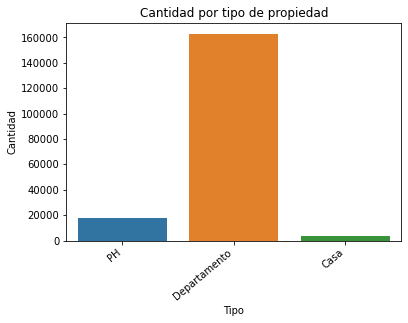

In [81]:
ax = sns.countplot(data = data, x = "property_type")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.xlabel('Tipo')
plt.ylabel('Cantidad')
plt.title('Cantidad por tipo de propiedad')

Text(0.5, 1.0, 'Cantidad de propiedades por zona l3')

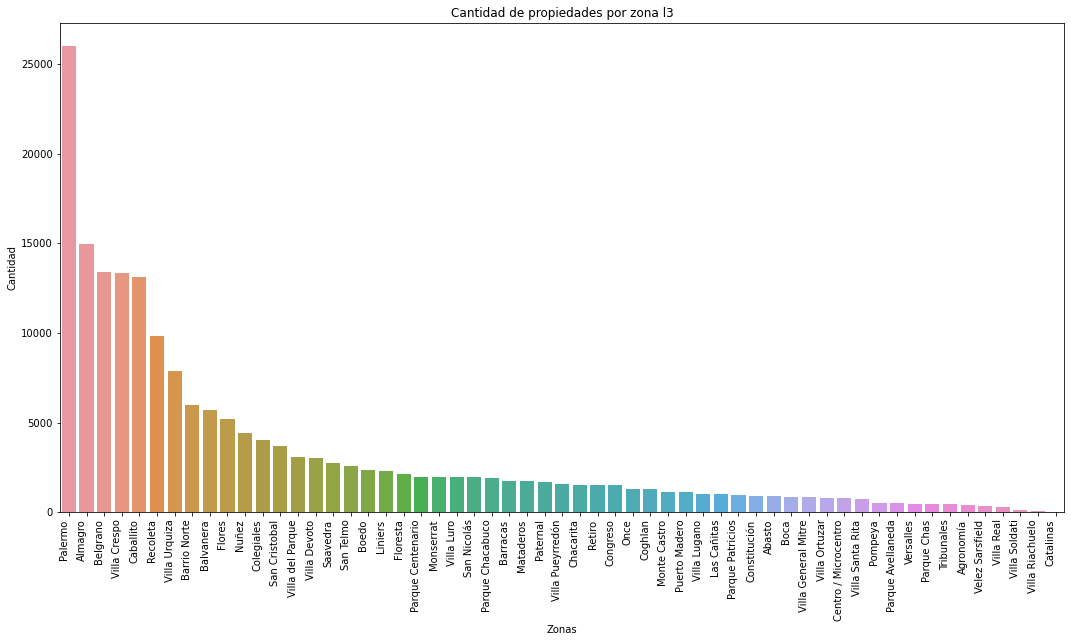

In [82]:
plt.figure(figsize=(18,9))
ax2 = sns.countplot(data = data, x = "l3", order = data['l3'].value_counts().index)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90, ha="right")
plt.xlabel('Zonas')
plt.ylabel('Cantidad')
plt.title('Cantidad de propiedades por zona l3')

### Escalada de datos

Realizo una escalada de datos pero antes modifico el nombre de mi dataset porque seguramente más adelante usaré mi dataset como está en data, es decir, sin escalarlos y sin reducir dimensionalidad.

In [83]:
data.head()

,start_date,end_date,created_on,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
1,2019-10-17,2019-11-21,2019-10-17,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,PH
2,2019-10-17,2019-11-01,2019-10-17,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,PH
3,2019-10-17,2019-12-23,2019-10-17,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,PH
5,2019-10-17,2019-11-01,2019-10-17,Capital Federal,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,PH
6,2019-10-17,2019-10-31,2019-10-17,Capital Federal,Villa Crespo,2.0,1.0,1.0,70.0,70.0,159500.0,PH


In [84]:
dataml = data.drop(columns = ['start_date','end_date','created_on'])

In [85]:
dataml.head()

,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
1,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,PH
2,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,PH
3,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,PH
5,Capital Federal,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,PH
6,Capital Federal,Villa Crespo,2.0,1.0,1.0,70.0,70.0,159500.0,PH


In [86]:
from sklearn.preprocessing import StandardScaler
X_esc = dataml.iloc[:, 2:7]
scl = StandardScaler()
X_esc = scl.fit_transform(X_esc)
for i in range(2,7):
    dataml.iloc[:, i] = X_esc[:, i-2]

In [87]:
dataml

,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type
1,Capital Federal,Boedo,-0.520306,-0.799552,1.193583,0.003639,-0.121404,159000.0,PH
2,Capital Federal,Palermo,-0.520306,-0.799552,-0.592457,-0.723597,-0.577791,125000.0,PH
3,Capital Federal,Palermo,-0.520306,-0.799552,-0.592457,0.439981,-0.402258,295000.0,PH
5,Capital Federal,Villa Crespo,-0.520306,-0.799552,-0.592457,-0.403613,-0.191617,150000.0,PH
6,Capital Federal,Villa Crespo,-0.520306,-0.799552,-0.592457,0.003639,0.299877,159500.0,PH
...,...,...,...,...,...,...,...,...,...
1146596,Capital Federal,Parque Avellaneda,3.181235,3.753411,1.193583,0.752693,0.729934,430000.0,Casa
1146611,Capital Federal,Flores,3.181235,3.753411,2.979623,1.923544,1.879678,489000.0,Departamento
1146614,Capital Federal,Tribunales,3.181235,3.753411,2.979623,1.399934,3.389267,250000.0,Departamento
1146645,Capital Federal,Recoleta,4.106620,4.891651,1.193583,2.505333,3.178626,395000.0,Departamento


### Transformación de variables categóricas

Transformo las variables categóricas de l2, l3 y property_type para utilizarlas en el análisis

In [88]:
dummy_pt = pd.get_dummies(dataml["property_type"], prefix="property_type")
dummy_l3 = pd.get_dummies(dataml["l3"], prefix="l3")
dummy_l2 = pd.get_dummies(dataml["l2"], prefix="l2")

In [89]:
dataml = pd.concat([dataml, dummy_pt], axis = 1)
dataml = pd.concat([dataml, dummy_l3], axis = 1)
dataml = pd.concat([dataml, dummy_l2], axis = 1)

In [90]:
dataml

,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type,property_type_Casa,...,l3_Villa Luro,l3_Villa Ortuzar,l3_Villa Pueyrredón,l3_Villa Real,l3_Villa Riachuelo,l3_Villa Santa Rita,l3_Villa Soldati,l3_Villa Urquiza,l3_Villa del Parque,l2_Capital Federal
1,Capital Federal,Boedo,-0.520306,-0.799552,1.193583,0.003639,-0.121404,159000.0,PH,0,...,0,0,0,0,0,0,0,0,0,1
2,Capital Federal,Palermo,-0.520306,-0.799552,-0.592457,-0.723597,-0.577791,125000.0,PH,0,...,0,0,0,0,0,0,0,0,0,1
3,Capital Federal,Palermo,-0.520306,-0.799552,-0.592457,0.439981,-0.402258,295000.0,PH,0,...,0,0,0,0,0,0,0,0,0,1
5,Capital Federal,Villa Crespo,-0.520306,-0.799552,-0.592457,-0.403613,-0.191617,150000.0,PH,0,...,0,0,0,0,0,0,0,0,0,1
6,Capital Federal,Villa Crespo,-0.520306,-0.799552,-0.592457,0.003639,0.299877,159500.0,PH,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1146596,Capital Federal,Parque Avellaneda,3.181235,3.753411,1.193583,0.752693,0.729934,430000.0,Casa,1,...,0,0,0,0,0,0,0,0,0,1
1146611,Capital Federal,Flores,3.181235,3.753411,2.979623,1.923544,1.879678,489000.0,Departamento,0,...,0,0,0,0,0,0,0,0,0,1
1146614,Capital Federal,Tribunales,3.181235,3.753411,2.979623,1.399934,3.389267,250000.0,Departamento,0,...,0,0,0,0,0,0,0,0,0,1
1146645,Capital Federal,Recoleta,4.106620,4.891651,1.193583,2.505333,3.178626,395000.0,Departamento,0,...,0,0,0,0,0,0,0,0,0,1


Elimino las columas que aún contienen las variables categóricas l2, l3 y property_type.
Finalmente el dataset queda con 184488 filas y 70 columnas

In [91]:
dataml1 = dataml.drop(dataml.columns[[0,1,8]], axis = 1)

In [92]:
dataml1

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type_Casa,property_type_Departamento,property_type_PH,l3_Abasto,...,l3_Villa Luro,l3_Villa Ortuzar,l3_Villa Pueyrredón,l3_Villa Real,l3_Villa Riachuelo,l3_Villa Santa Rita,l3_Villa Soldati,l3_Villa Urquiza,l3_Villa del Parque,l2_Capital Federal
1,-0.520306,-0.799552,1.193583,0.003639,-0.121404,159000.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,-0.520306,-0.799552,-0.592457,-0.723597,-0.577791,125000.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,-0.520306,-0.799552,-0.592457,0.439981,-0.402258,295000.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
5,-0.520306,-0.799552,-0.592457,-0.403613,-0.191617,150000.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
6,-0.520306,-0.799552,-0.592457,0.003639,0.299877,159500.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1146596,3.181235,3.753411,1.193583,0.752693,0.729934,430000.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1146611,3.181235,3.753411,2.979623,1.923544,1.879678,489000.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1146614,3.181235,3.753411,2.979623,1.399934,3.389267,250000.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1146645,4.106620,4.891651,1.193583,2.505333,3.178626,395000.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


Por la cantidad de datos, decido no hacer reducción de dimensionalidad como en el proyecto anterior ya que considero que puedo tratar todos los datos con un costo computacional considerable.

## <span style="color:red"> OBJETIVO 1: Modelos avanzados; Random Forest y XGboos

Ahora sí, aplicaré los modelos de machine learning. Como en el proyecto 2 el modelo de random forest me dio mejores resultados que el modelo de benchmark de regresión lineal, vecinos más cercanos, árbol de decisión y los de polynomial features con Lasso y Ridge, utilizaré el de random forest como benchmark (actualizándolo al nuevo dataset) y agregaré el de XGboost.

### Random Forest

In [93]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
import sklearn.metrics as metrics
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split

In [94]:
dataml2 = dataml1.drop(columns = ['price'])

Defino las variables y realizo un train test split

In [95]:
X = dataml2
y = dataml1.price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(129141, 66) (129141,) (55347, 66) (55347,)


Busco los mejores hiperparámetros para mi modelo

In [100]:
from sklearn.model_selection import RandomizedSearchCV

X, y = dataml2, dataml1.price
model = RandomForestRegressor(random_state=42)
param_grid = {'n_estimators':np.arange(1, 80),
              'criterion': ["auto",'mse'], 
              'max_features':["auto", "sqrt"],
              "bootstrap": [True, False],
              'max_depth':np.arange(1, 20)}
grid_search = RandomizedSearchCV(model, param_grid, n_jobs=-1, cv=2, n_iter = 25)
grid_search.fit(dataml2, dataml1.price)
print(grid_search.best_params_)

{'n_estimators': 28, 'max_features': 'auto', 'max_depth': 13, 'criterion': 'mse', 'bootstrap': True}


Entreno mi nuevo modelo con los parámetros elegidos.

In [101]:
regRF = RandomForestRegressor(n_estimators=28, max_depth=13, criterion="mse", max_features='auto', bootstrap=True, n_jobs=-1, random_state = 42)
regRF.fit(X_train,y_train)

RandomForestRegressor(max_depth=13, n_estimators=28, n_jobs=-1, random_state=42)

In [102]:
y_train_pred_regRF = regRF.predict(X_train)
y_test_pred_regRF = regRF.predict(X_test)

Evalúo

In [103]:
print('R^2 Training Score: {:.2f} \nR^2 Validation Score: {:.2f} \nRsme Train: {:.2f}  \nRsme Test: {:.2f} \nr2_cv: {:.2f} \nrsme_cv: {:.2f}'.format(regRF.score(X_train, y_train), 
                                                                                             regRF.score(X_test, y_test),
                                                                                             np.sqrt(metrics.mean_squared_error(y_train, y_train_pred_regRF)),
                                                                                             np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_regRF)),
                                                                                             cross_val_score(regRF, X_train, y_train, scoring='r2', cv=5).mean(),
                                                                                             cross_val_score(regRF, X_train, y_train, scoring='neg_root_mean_squared_error', cv=5).mean()))
                                                                                             

R^2 Training Score: 0.81 
R^2 Validation Score: 0.78 
Rsme Train: 40322.62  
Rsme Test: 42514.16 
r2_cv: 0.78 
rsme_cv: -42744.64


### XGboost Regressor

Elijo utilizar este modelo no sólo porque no lo había aplicado antes si no porque también quiero evaluar la mejora en la performance al aplicar la técnica del boosting, propia de este modelo. Es decir, el sistema comenzará con modelos débiles para secuencialmente aprender los errores de éstos e ir puliendo el modelo a medida que avanza (mejorando sus parámetros), hasta tener resultado más robustos. Los modelos se agregan secuencialmente hasta que no quede ningún error para eliminar. XGBoost lo aplicará a tree ensambles. 

Luego de definir las variables y separar la muestra para test, comienzo directamente buscando los mejores hiperparámetros para mi modelo con Random Search

In [96]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

In [105]:
X = dataml2
y = dataml1.price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(129141, 66) (129141,) (55347, 66) (55347,)


In [106]:
model = xgb.XGBRegressor(random_state=42)
param_grid = {'n_estimators': np.arange(1,100), 'max_depth': np.arange (1,100), 'random_state': np.arange (1,100)}
grid_search = RandomizedSearchCV(model, param_grid, n_jobs = 1, cv = 2, n_iter = 25)
grid_search.fit(X_train,y_train)
print(grid_search.best_params_)

{'random_state': 51, 'n_estimators': 88, 'max_depth': 15}


Entreno

In [107]:
XGB = xgb.XGBRegressor(n_estimators=88, max_depth=15, random_state = 51)
XGB.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=15,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=88, n_jobs=0, num_parallel_tree=1, random_state=51,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [108]:
y_train_pred_XGB = XGB.predict(X_train)
y_test_pred_XGB = XGB.predict(X_test)

Evalúo

In [109]:
print('R^2 Training Score: {:.2f} \nR^2 Validation Score: {:.2f} \nRsme Train: {:.2f}  \nRsme Test: {:.2f} \nr2_cv: {:.2f} \nrsme_cv: {:.2f}'.format(XGB.score(X_train, y_train), 
                                                                                             XGB.score(X_test, y_test),
                                                                                             np.sqrt(metrics.mean_squared_error(y_train, y_train_pred_XGB)),
                                                                                             np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_XGB)),
                                                                                             cross_val_score(XGB, X_train, y_train, scoring='r2', cv=5).mean(),
                                                                                             cross_val_score(XGB, X_train, y_train, scoring='neg_root_mean_squared_error', cv=5).mean()))
                                                                                             

R^2 Training Score: 0.91 
R^2 Validation Score: 0.84 
Rsme Train: 27496.82  
Rsme Test: 36839.56 
r2_cv: 0.83 
rsme_cv: -37398.20


### Interpretacion de los modelos

En este caso, el modelo que mejor resultados me ha dado es el XGboost, con un R2 validation score de 0.84, vs el 0.78 del Random Forest. Vale aclarar que la diferencia entre el training score del random forest y su vc, es menor que el del XGB.
Se prefiere en este caso, el modelo de XGBoost ya que tenemos una mejora.

## <span style="color:red"> OBJETIVO 2: Desempeño futuro y predicción en el tiempo.

Imaginamos un escenario en el que la empresa quiere analizar su performance y desempeño futuro en función de los ingresos por la publicación de propiedades. A más propiedades y a mayor precio publicado, mayor será la comisión. Supongamos que la empresa quiere conocer cómo será este crecimiento en USD para Capital Federal, donde tiene pensado incorporar más promotores de ventas (por ejemplo). 
Además, analizar si existe alguna estacionalidad de cuándo se publican más propiedades para estar atentos a la demanda de trabajo en Properati y a las oportunidades de mercado.

Para los fines de esta pregunta, sólo voy a necesitar transformar a fecha la columna "start_date", que es cuando comienza a correr la publicación. Por esta razón, voy a eliminar las columnas created_on y end_date. Igualmente, me sería difícil trabajar end_date ya que para el momento en que tenemos los datos, muchos anuncios no han cerrado, y el valor ingresado es el 9999-12-31, que no lo lee como fecha. Lo vemos.

### Transformación del dataset a datetime

In [97]:
data['fecha_creada'] = pd.to_datetime(data.created_on)

<ipython-input-97-325603bb8f39>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['fecha_creada'] = pd.to_datetime(data.created_on)


In [98]:
data['fecha_inicio'] = pd.to_datetime(data.start_date)

<ipython-input-98-d9bb970e9cc4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['fecha_inicio'] = pd.to_datetime(data.start_date)


In [99]:
data['fecha_fin'] = pd.to_datetime(data.end_date)

OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 9999-12-31 00:00:00

Aquí aparece el error que comentábamos con el que se nos complica transformar la fecha 9999-12-31, a no ser que la reemplacemos por otra fecha. Pero en este momento no la necesitamos para responder a la pregunta que nos planteamos, por lo que eliminamos esta columna. 

In [100]:
data.loc[data['end_date'].str.contains('9999-12-31')]

,start_date,end_date,created_on,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type,fecha_creada,fecha_inicio
50,2019-10-17,9999-12-31,2019-10-17,Capital Federal,Palermo,2.0,1.0,1.0,54.0,54.0,240000.0,Departamento,2019-10-17,2019-10-17
65,2019-10-17,9999-12-31,2019-10-17,Capital Federal,Belgrano,2.0,1.0,1.0,31.0,31.0,114300.0,Departamento,2019-10-17,2019-10-17
68,2019-10-17,9999-12-31,2019-10-17,Capital Federal,Belgrano,2.0,1.0,1.0,41.0,41.0,125600.0,Departamento,2019-10-17,2019-10-17
74,2019-10-17,9999-12-31,2019-10-17,Capital Federal,Belgrano,2.0,1.0,1.0,41.0,41.0,138400.0,Departamento,2019-10-17,2019-10-17
78,2019-10-17,9999-12-31,2019-10-17,Capital Federal,Belgrano,2.0,1.0,1.0,57.0,46.0,192500.0,Departamento,2019-10-17,2019-10-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1146531,2020-10-30,9999-12-31,2020-10-30,Capital Federal,Recoleta,5.0,4.0,2.0,140.0,133.0,286000.0,Departamento,2020-10-30,2020-10-30
1146534,2020-10-30,9999-12-31,2020-10-30,Capital Federal,Monserrat,5.0,4.0,2.0,123.0,119.0,250000.0,Departamento,2020-10-30,2020-10-30
1146545,2020-10-30,9999-12-31,2020-10-30,Capital Federal,Villa Urquiza,5.0,4.0,3.0,117.0,101.0,325000.0,Departamento,2020-10-30,2020-10-30
1146614,2020-10-30,9999-12-31,2020-10-30,Capital Federal,Tribunales,6.0,5.0,3.0,118.0,158.0,250000.0,Departamento,2020-10-30,2020-10-30


Quitamos las columnas que no necesitamos.

In [101]:
data.drop(columns=['start_date','created_on', "end_date"], inplace = True)
data.head()

/Users/eugeniasandrone/opt/miniconda3/envs/datascience/lib/python3.8/site-packages/pandas/core/frame.py:4305: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type,fecha_creada,fecha_inicio
1,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,PH,2019-10-17,2019-10-17
2,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,PH,2019-10-17,2019-10-17
3,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,PH,2019-10-17,2019-10-17
5,Capital Federal,Villa Crespo,2.0,1.0,1.0,56.0,56.0,150000.0,PH,2019-10-17,2019-10-17
6,Capital Federal,Villa Crespo,2.0,1.0,1.0,70.0,70.0,159500.0,PH,2019-10-17,2019-10-17


Reordenamos el dataset por fecha de creada

In [102]:
data.sort_values('fecha_creada', inplace = True)
data.reset_index(drop=True, inplace = True)
data

<ipython-input-102-c79c1b1f7926>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.sort_values('fecha_creada', inplace = True)


,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type,fecha_creada,fecha_inicio
0,Capital Federal,Villa Devoto,5.0,4.0,2.0,180.0,150.0,270000.0,PH,2019-01-01,2019-01-01
1,Capital Federal,San Cristobal,2.0,1.0,1.0,42.0,40.0,96500.0,Departamento,2019-01-01,2019-01-01
2,Capital Federal,Villa Crespo,2.0,1.0,1.0,38.0,35.0,84102.0,Departamento,2019-01-01,2019-01-01
3,Capital Federal,Villa Crespo,2.0,1.0,1.0,37.0,37.0,89500.0,Departamento,2019-01-01,2019-01-01
4,Capital Federal,Villa Crespo,2.0,1.0,1.0,62.0,48.0,110000.0,Departamento,2019-01-01,2019-01-01
...,...,...,...,...,...,...,...,...,...,...,...
184483,Capital Federal,Caballito,3.0,2.0,1.0,50.0,44.0,88000.0,Departamento,2020-12-14,2020-12-14
184484,Capital Federal,Caballito,3.0,2.0,2.0,81.0,64.0,149000.0,PH,2020-12-14,2020-12-14
184485,Capital Federal,Caballito,3.0,2.0,2.0,62.0,60.0,153000.0,Departamento,2020-12-14,2020-12-14
184486,Capital Federal,Versalles,3.0,2.0,1.0,104.0,72.0,105000.0,PH,2020-12-14,2020-12-14


In [103]:
data.tail()

,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type,fecha_creada,fecha_inicio
184483,Capital Federal,Caballito,3.0,2.0,1.0,50.0,44.0,88000.0,Departamento,2020-12-14,2020-12-14
184484,Capital Federal,Caballito,3.0,2.0,2.0,81.0,64.0,149000.0,PH,2020-12-14,2020-12-14
184485,Capital Federal,Caballito,3.0,2.0,2.0,62.0,60.0,153000.0,Departamento,2020-12-14,2020-12-14
184486,Capital Federal,Versalles,3.0,2.0,1.0,104.0,72.0,105000.0,PH,2020-12-14,2020-12-14
184487,Capital Federal,Belgrano,4.0,3.0,1.0,85.0,85.0,199000.0,Departamento,2020-12-14,2020-12-14


In [104]:
data.describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,184488.000000,184488.000000,184488.000000,184488.000000,184488.000000,184488.000000
mean,2.562259,1.702445,1.331715,69.874896,61.458141,175360.015725
std,1.080634,0.878551,0.559899,34.376799,28.484663,91431.226024
min,1.000000,0.000000,1.000000,10.000000,1.000000,0.000000
25%,2.000000,1.000000,1.000000,44.000000,40.000000,108000.000000
50%,3.000000,2.000000,1.000000,61.000000,54.000000,150000.000000
75%,3.000000,2.000000,2.000000,87.000000,75.000000,222000.000000
max,7.000000,6.000000,3.000000,204.000000,174.000000,497500.000000


Graficamos en una línea de tiempo los datos tal cual están

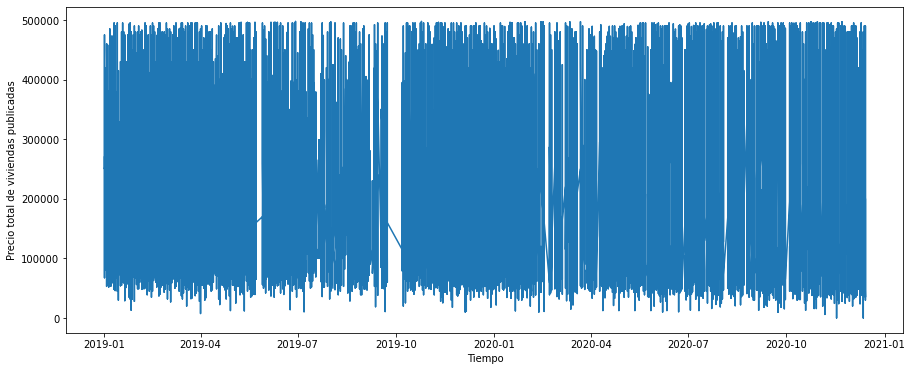

In [105]:
plt.figure(figsize = (15,6))
plt.plot(data.fecha_inicio, data.price)
plt.xlabel('Tiempo')
plt.ylabel('Precio total de viviendas publicadas')
plt.show()

### Exploración del dataset con datetime

Realizo un resampleo diario, que me va a sumar el monto del ingreso de las propiedades por cada día. Luego lo grafico.

In [106]:
diario = data.resample('D', on = 'fecha_inicio').sum()
print(diario.shape)
diario.head()

(714, 6)


,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
fecha_inicio,,,,,,
2019-01-01,102.0,65.0,50.0,2720.0,2408.0,6999202.0
2019-01-02,187.0,126.0,93.0,4949.0,4434.0,12517805.0
2019-01-03,300.0,199.0,150.0,8007.0,7282.0,20200324.0
2019-01-04,439.0,305.0,199.0,10387.0,9375.0,27575668.0
2019-01-05,196.0,126.0,91.0,5205.0,4798.0,12592160.0


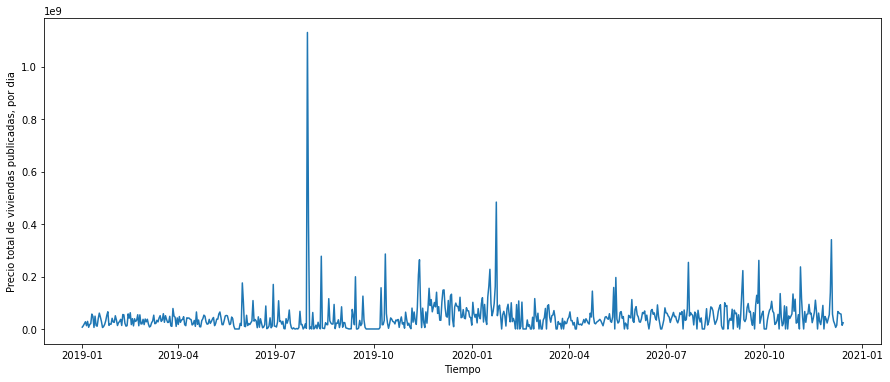

In [107]:
plt.figure(figsize = (15,6))
plt.plot(diario.index, diario.price)
plt.xlabel('Tiempo')
plt.ylabel('Precio total de viviendas publicadas, por dia')
plt.show()

Hay valores atípicos, pero no los modificaremos porque puede deberse a una propiedad grande o a que ese día ingresaron varias propiedades.

In [108]:
data_atípica = diario[(diario.price > 1000000000)]

In [109]:
data_atípica

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
fecha_inicio,,,,,,
2019-07-31,14959.0,9731.0,8069.0,413712.0,361282.0,1.130543e+09


Realizo ahora un resampleo semanal.

In [110]:
semanal = data.resample('W', on = 'fecha_inicio').sum()
print(semanal.shape)

(103, 6)


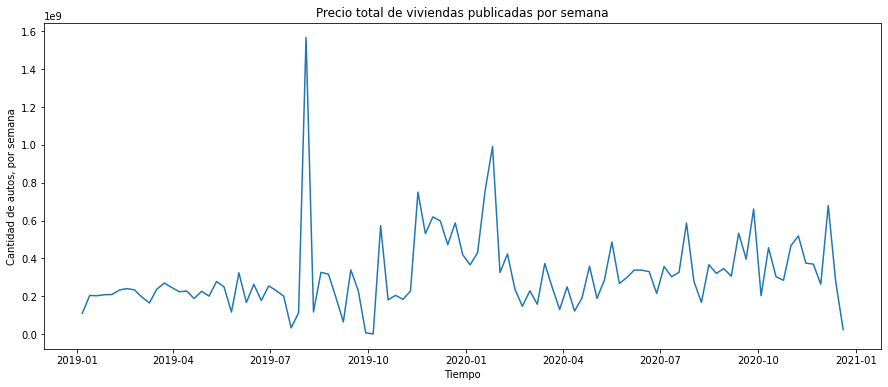

In [111]:
plt.figure(figsize = (15,6))
plt.plot(semanal.index, semanal.price)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos, por semana')
plt.title("Precio total de viviendas publicadas por semana")
plt.show()

Y un resampleo mensual

In [112]:
mensual = data.resample('M', on = 'fecha_inicio').sum()
print(mensual.shape)

(24, 6)


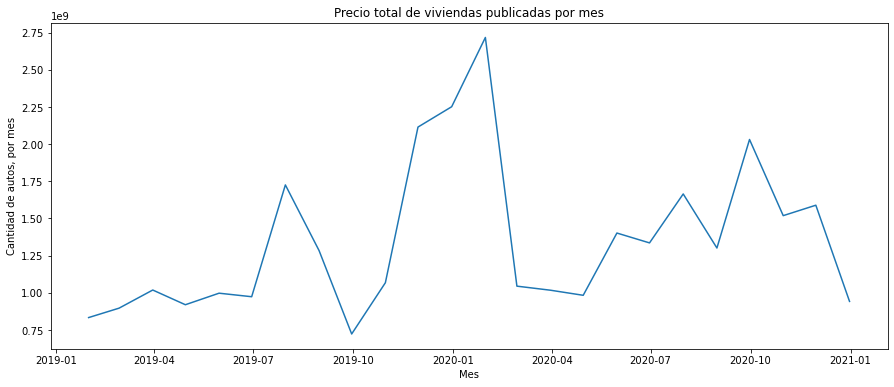

In [113]:
plt.figure(figsize = (15,6))
plt.plot(mensual.index, mensual.price)
plt.xlabel('Mes')
plt.ylabel('Cantidad de autos, por mes')
plt.title("Precio total de viviendas publicadas por mes")
plt.show()

En los tres gráficos anteriores se pueden observar un comportamiento errático. Excluyendo el pico atípico, a finales de 2019 se comenzó a notar un crecimiento en el monto total publicado, con una caída abrupta a partir de Marzo de 2020, que claramente se lo podemos atribuir a la crisis del coronavirus. Los meses siguientes siguiron bajos con una leve recuperación en el último semestre del año. No alcanzo a ver una estacionalidad en los datos (aunque eso lo veremos más adelante) pero sí una muy leve tendencia creciente. 

El gráfico de barras que sigue nos permite visualizar de otro modo dicho comportamiento mensual.

/Users/eugeniasandrone/opt/miniconda3/envs/datascience/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


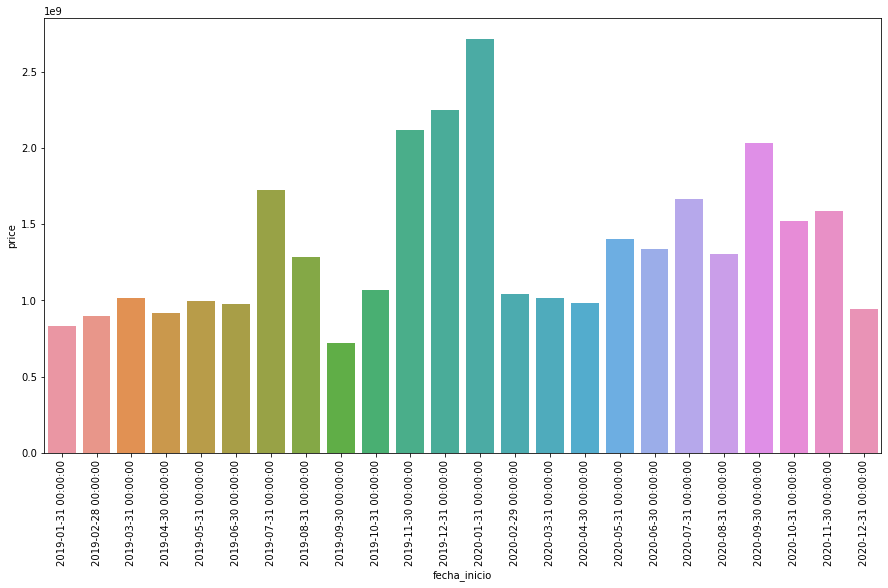

In [114]:
plt.figure(figsize = (15,8))
plt.xticks(rotation = 90)
sns.barplot(mensual.index, mensual.price)
plt.show()

### Componentes de la serie

Analizaremos los componentes de la serie para el resampleo diario, semanal y mensual. La tendencia, estacionalidad y ruido.
Comenzamos con la media móvil y rolling windows

**Media movil - diaria -**

In [115]:
diariaMean = data.resample('D', on = 'fecha_inicio').sum()
print(diariaMean.shape)
diariaMean.head()

(714, 6)


,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
fecha_inicio,,,,,,
2019-01-01,102.0,65.0,50.0,2720.0,2408.0,6999202.0
2019-01-02,187.0,126.0,93.0,4949.0,4434.0,12517805.0
2019-01-03,300.0,199.0,150.0,8007.0,7282.0,20200324.0
2019-01-04,439.0,305.0,199.0,10387.0,9375.0,27575668.0
2019-01-05,196.0,126.0,91.0,5205.0,4798.0,12592160.0


In [116]:
ventana = int(365*4/7)
diaria_promedio_tendencia = diariaMean.price.rolling(window=ventana, center = True).mean()
diaria_promedio_tendencia

fecha_inicio
2019-01-01   NaN
2019-01-02   NaN
2019-01-03   NaN
2019-01-04   NaN
2019-01-05   NaN
              ..
2020-12-10   NaN
2020-12-11   NaN
2020-12-12   NaN
2020-12-13   NaN
2020-12-14   NaN
Freq: D, Name: price, Length: 714, dtype: float64

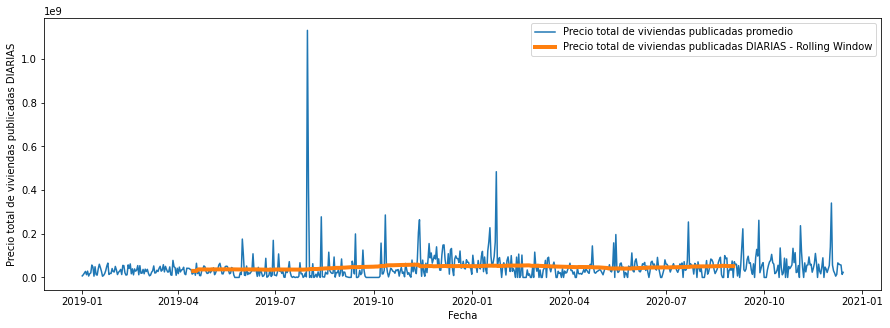

In [118]:
plt.figure(figsize = (15,5))
plt.plot(diariaMean.index, diariaMean.price, label = 'Precio total de viviendas publicadas promedio')
plt.plot(diaria_promedio_tendencia, lw = 4, label = 'Precio total de viviendas publicadas DIARIAS - Rolling Window')
plt.xlabel('Fecha')
plt.ylabel('Precio total de viviendas publicadas DIARIAS')
plt.legend()
plt.show()

**Tendencia Lineal - diaria**

In [119]:
diario['fecha_numeros']=diario.index.map(datetime.datetime.toordinal)
diario.head()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,fecha_numeros
fecha_inicio,,,,,,,
2019-01-01,102.0,65.0,50.0,2720.0,2408.0,6999202.0,737060
2019-01-02,187.0,126.0,93.0,4949.0,4434.0,12517805.0,737061
2019-01-03,300.0,199.0,150.0,8007.0,7282.0,20200324.0,737062
2019-01-04,439.0,305.0,199.0,10387.0,9375.0,27575668.0,737063
2019-01-05,196.0,126.0,91.0,5205.0,4798.0,12592160.0,737064


In [120]:
from sklearn.linear_model import LinearRegression
lrD = LinearRegression()
lrD.fit(diario.fecha_numeros.values.reshape(-1, 1), diariaMean.price)

LinearRegression()

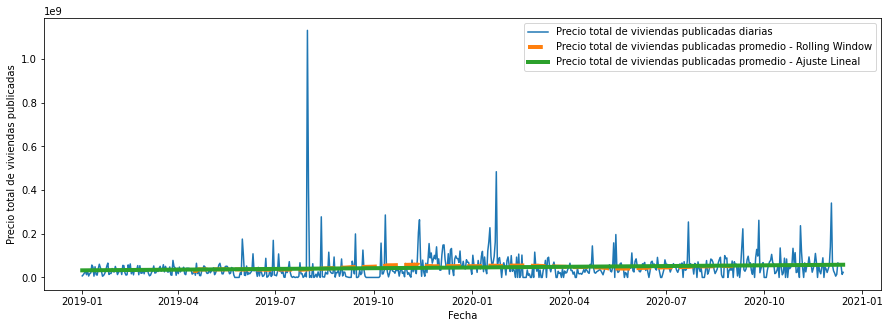

In [121]:
plt.figure(figsize = (15,5))
plt.plot(diario.index, diariaMean.price, label = 'Precio total de viviendas publicadas diarias')
plt.plot(diaria_promedio_tendencia, ls = '--', lw = 4, label = 'Precio total de viviendas publicadas promedio - Rolling Window')
plt.plot(diario.index, lrD.predict(diario.fecha_numeros.values.reshape(-1, 1)), lw = 4, label = 'Precio total de viviendas publicadas promedio - Ajuste Lineal')
plt.xlabel('Fecha')
plt.ylabel('Precio total de viviendas publicadas')
plt.legend()
plt.show()

Aunque no del todo clara, vemos una tendencia positiva, de leve crecimiento si comparamos desde inicios de 2019 a finales del 2020

Analizo los restantes componentes con la librería de statsmodels, que además de la tendencia están la estacionalidad y el ruido.

In [122]:
import statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose

result1 = seasonal_decompose(diariaMean.price, model='additive')

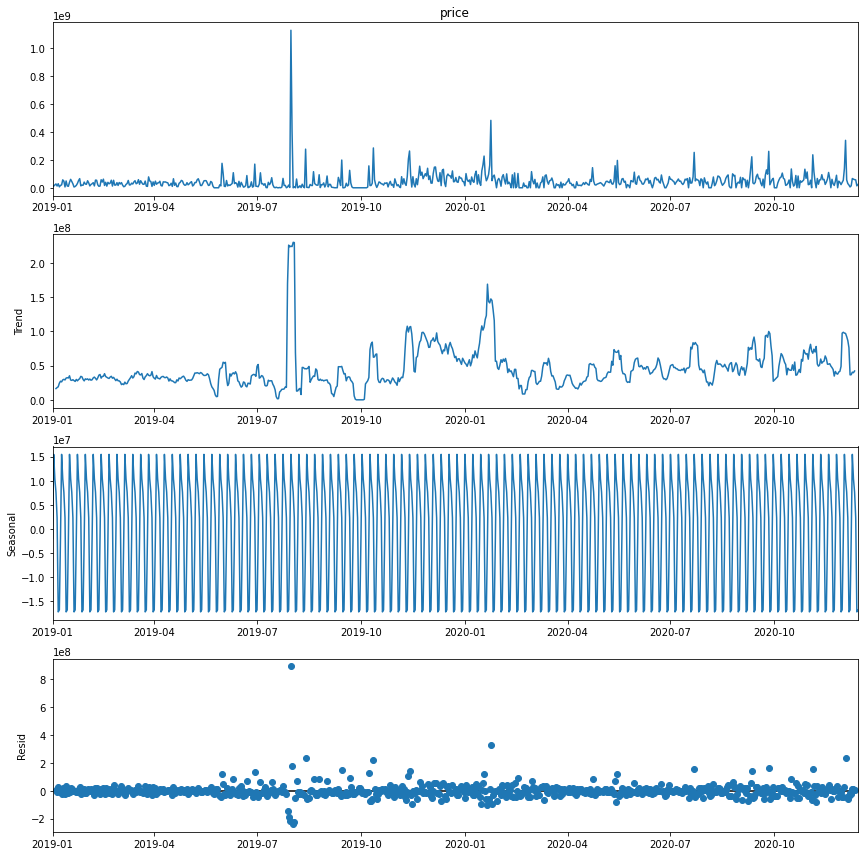

In [123]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = [12,12]
result1.plot()
plt.show()

Desde el resampleo diario, vemos que la tendencia puede ser levemente positiva, que es muy difícil encontrar una estacionalidad y que hay poco ruido, aunque se manifiesta el residuo en los períodos puntuales donde hay picos.

**Media movil - semanal -**

In [124]:
semanalMean = data.resample('W', on = 'fecha_inicio').sum()
print(semanalMean.shape)

(103, 6)


In [125]:
ventana = int(365/30)
semanal_promedio_tendencia = semanalMean.price.rolling(window=ventana, center = True).mean()

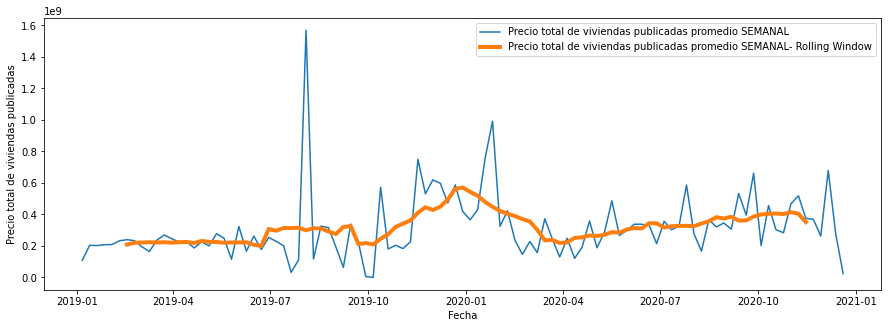

In [126]:
plt.figure(figsize = (15,5))
plt.plot(semanalMean.index, semanalMean.price, label = 'Precio total de viviendas publicadas promedio SEMANAL')
plt.plot(semanal_promedio_tendencia, lw = 4, label = 'Precio total de viviendas publicadas promedio SEMANAL- Rolling Window')
plt.xlabel('Fecha')
plt.ylabel('Precio total de viviendas publicadas')
plt.legend()
plt.show()

**Tendencia Lineal - semanal**

In [127]:
semanal['fecha_numeros']=semanal.index.map(datetime.datetime.toordinal)

In [128]:
from sklearn.linear_model import LinearRegression
lrS = LinearRegression()
lrS.fit(semanal.fecha_numeros.values.reshape(-1, 1), semanalMean.price)

LinearRegression()

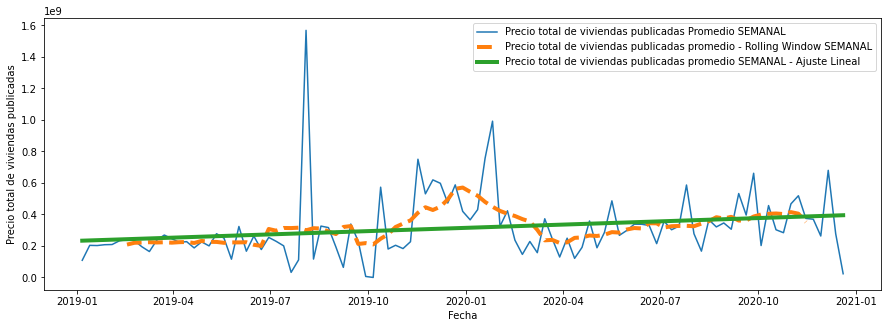

In [129]:
plt.figure(figsize = (15,5))
plt.plot(semanal.index, semanalMean.price, label = 'Precio total de viviendas publicadas Promedio SEMANAL')
plt.plot(semanal_promedio_tendencia, ls = '--', lw = 4, label = 'Precio total de viviendas publicadas promedio - Rolling Window SEMANAL')
plt.plot(semanal.index, lrS.predict(semanal.fecha_numeros.values.reshape(-1, 1)), lw = 4, label = 'Precio total de viviendas publicadas promedio SEMANAL - Ajuste Lineal')
plt.xlabel('Fecha')
plt.ylabel('Precio total de viviendas publicadas')
plt.legend()
plt.show()

En este último gráfico se ve claramente la tendencia positiva de crecimiento. Analizamos la estacionalidad ahora

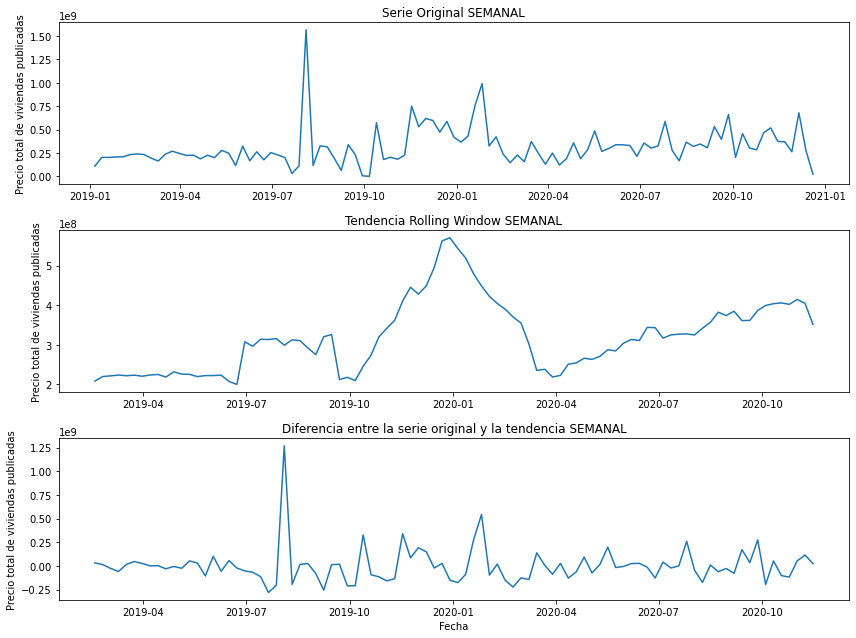

In [131]:
plt.figure(figsize = (12,9))

plt.subplot(3,1,1)
plt.title('Serie Original SEMANAL')
plt.plot(semanal.index, semanalMean.price)
plt.ylabel('Precio total de viviendas publicadas')

plt.subplot(3,1,2)
plt.title('Tendencia Rolling Window SEMANAL')
plt.plot(semanal_promedio_tendencia)
plt.ylabel('Precio total de viviendas publicadas')

plt.subplot(3,1,3)
plt.title('Diferencia entre la serie original y la tendencia SEMANAL')
plt.plot(semanal.index, semanalMean.price - semanal_promedio_tendencia)
plt.xlabel('Fecha')
plt.ylabel('Precio total de viviendas publicadas')

plt.tight_layout()
plt.show()


Claramente, en el resampleo semana, observamos la tendencia positiva pero no encontramos ningún patrón de estacionaidad. 
Continuamos analizando la autocorrelación de los datos del dataset.

### Autocorrelación

Realizamos la autocorrelación y determinamos dos lags de 50 semanas, ya que con la cantidad de datos no nos alcanza para hacerla año a año.

In [132]:
from statsmodels.tsa.stattools import acf

nlags =  50*2
autocorr = acf(semanalMean.price, nlags = nlags)

/Users/eugeniasandrone/opt/miniconda3/envs/datascience/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:665: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


In [133]:
autocorr.shape

(101,)

Text(0.5, 0, 'lag')

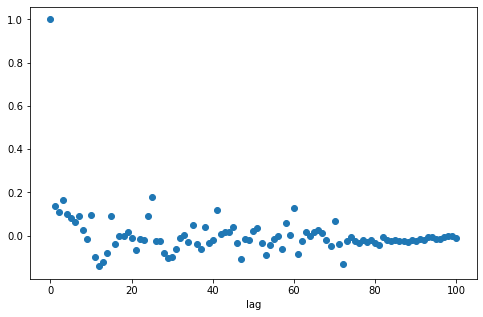

In [134]:
plt.figure(figsize = (8,5))
plt.scatter(np.arange(nlags+1), autocorr)
plt.xlabel('lag')

El primer valor es uno porque se correlaciona con sí misma, pero luego veo que los valores son muy bajos, casi con correlación nula, y se mantienen así en el tiempo. Esto también puede explicar por qué no hay estacionalidad. Me hace pensar que las variaciones en los datos no se deben a fuerzas sólo del mercado, si no que a decisiones de la empresa que puedan hacer crecer o decrecer el número de inmuebles sin generar una estacionalidad. Por ejemplo, si deciden enfocarse más en una zona que en otra, si deciden aumentar o disminuir la fuerza de ventas, si realizan campañas publicitarias de manera errática o con una estrategia diferente a lo que estoy analizando, etc. Lo que si podría quizás predecir es que si vienen trabajando tal cual como lo vienen haciendo y no modifican otras variables, podríamos considerar los resultados de este esyudio.

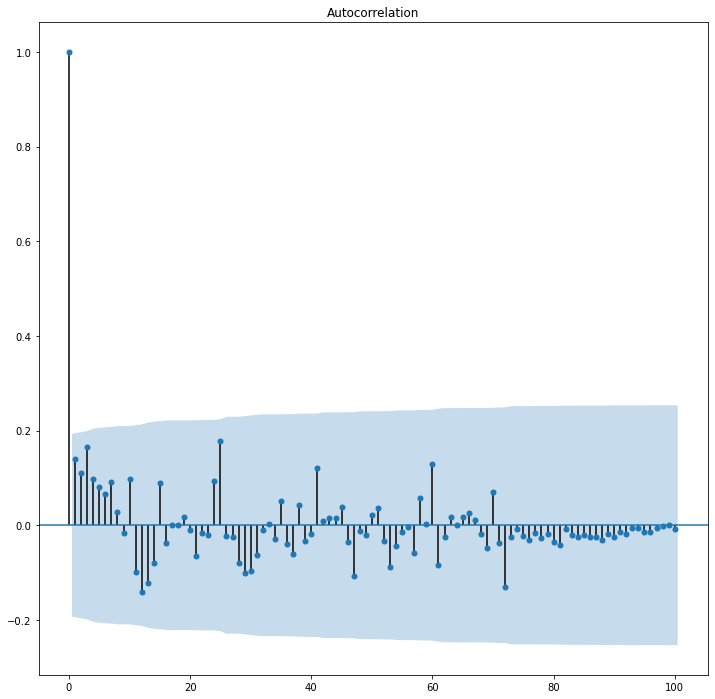

In [135]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(semanalMean.price, lags = 50*2)
plt.show()

Este gráfico nos muestra el intervalo de confianza, que también es bajo, y cómo es el comportamiento de la correlación de cada mes. Claramente la correlación es muy baja y no sigue patrones.

### PROPHET

Ahora sí utilizamos el modelo de prophet para predecir los precios acumulados de las publicaciones para el siguiente trimestre. Por el análisis de los datos que hemos hecho previamente, creo que al haber poca correlación y poca estacionalidad, no sería el mejor dataset para usar para este tipo de predicciones. 

In [136]:
import chart_studio.plotly as py
from fbprophet import Prophet
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
from ipywidgets import IntSlider
IntSlider()

IntSlider(value=0)

In [137]:
data

,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type,fecha_creada,fecha_inicio
0,Capital Federal,Villa Devoto,5.0,4.0,2.0,180.0,150.0,270000.0,PH,2019-01-01,2019-01-01
1,Capital Federal,San Cristobal,2.0,1.0,1.0,42.0,40.0,96500.0,Departamento,2019-01-01,2019-01-01
2,Capital Federal,Villa Crespo,2.0,1.0,1.0,38.0,35.0,84102.0,Departamento,2019-01-01,2019-01-01
3,Capital Federal,Villa Crespo,2.0,1.0,1.0,37.0,37.0,89500.0,Departamento,2019-01-01,2019-01-01
4,Capital Federal,Villa Crespo,2.0,1.0,1.0,62.0,48.0,110000.0,Departamento,2019-01-01,2019-01-01
...,...,...,...,...,...,...,...,...,...,...,...
184483,Capital Federal,Caballito,3.0,2.0,1.0,50.0,44.0,88000.0,Departamento,2020-12-14,2020-12-14
184484,Capital Federal,Caballito,3.0,2.0,2.0,81.0,64.0,149000.0,PH,2020-12-14,2020-12-14
184485,Capital Federal,Caballito,3.0,2.0,2.0,62.0,60.0,153000.0,Departamento,2020-12-14,2020-12-14
184486,Capital Federal,Versalles,3.0,2.0,1.0,104.0,72.0,105000.0,PH,2020-12-14,2020-12-14


In [138]:
datarename = data.rename(columns = {'fecha_inicio':'ds', "price": "y"}) 

In [139]:
datarename

,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,y,property_type,fecha_creada,ds
0,Capital Federal,Villa Devoto,5.0,4.0,2.0,180.0,150.0,270000.0,PH,2019-01-01,2019-01-01
1,Capital Federal,San Cristobal,2.0,1.0,1.0,42.0,40.0,96500.0,Departamento,2019-01-01,2019-01-01
2,Capital Federal,Villa Crespo,2.0,1.0,1.0,38.0,35.0,84102.0,Departamento,2019-01-01,2019-01-01
3,Capital Federal,Villa Crespo,2.0,1.0,1.0,37.0,37.0,89500.0,Departamento,2019-01-01,2019-01-01
4,Capital Federal,Villa Crespo,2.0,1.0,1.0,62.0,48.0,110000.0,Departamento,2019-01-01,2019-01-01
...,...,...,...,...,...,...,...,...,...,...,...
184483,Capital Federal,Caballito,3.0,2.0,1.0,50.0,44.0,88000.0,Departamento,2020-12-14,2020-12-14
184484,Capital Federal,Caballito,3.0,2.0,2.0,81.0,64.0,149000.0,PH,2020-12-14,2020-12-14
184485,Capital Federal,Caballito,3.0,2.0,2.0,62.0,60.0,153000.0,Departamento,2020-12-14,2020-12-14
184486,Capital Federal,Versalles,3.0,2.0,1.0,104.0,72.0,105000.0,PH,2020-12-14,2020-12-14


In [154]:
m = Prophet()
m.fit(datarename)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Elijo proyectar 2 meses

In [155]:
future = m.make_future_dataframe(periods=60)
future.tail()

,ds
694,2021-02-08
695,2021-02-09
696,2021-02-10
697,2021-02-11
698,2021-02-12


In [156]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
694,2021-02-08,155983.167078,35063.713424,274660.752733
695,2021-02-09,158630.223201,47973.032000,275956.224122
696,2021-02-10,157293.379404,47225.021851,272951.857508
697,2021-02-11,153998.580194,37338.127383,274177.495095
698,2021-02-12,156310.589525,30249.743623,272381.946729


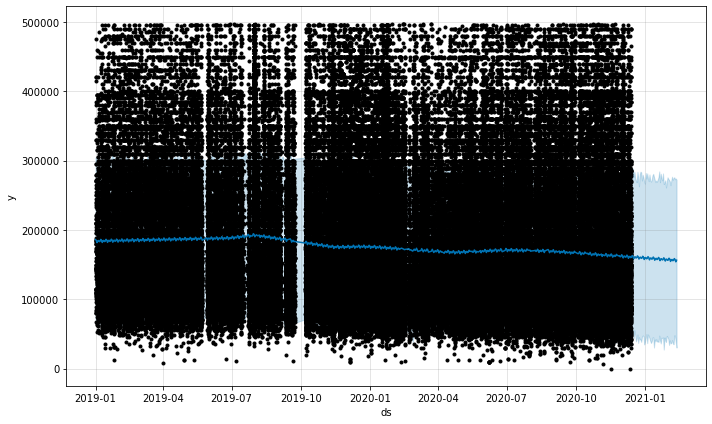

In [157]:
fig1 = m.plot(forecast)

En el gráfico veo la proyección para dos meses. Me llama la atención que tenga una tendencia decreciente, cuando en los análisis anteriores observé que ta tendencia era creciente. He controlado el dataset y repetido el procedimiento varias veces y de distintas formas, pero me sigue arrojando los mismos datos. 

A continuación evalúo los componentes.

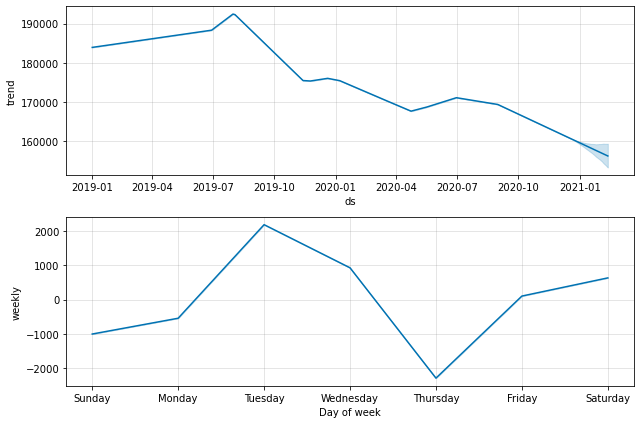

In [158]:
fig2 = m.plot_components(forecast)

Como vimos en el primer gráfico de Prophet, la tendencia aparece negativa, en contraposición a los análisis de antes.
En cuanto alanálisis semanal, veo que los Martes y Miércoles puede llegar a tener más ingreso de propiedades, mientras que los Jueves son los días menos activos.

## <span style="color:red"> OBJETIVO 3: Analizo las tendencias por barrios con más avisos para el tipo de vivienda Departamento

Exploramos el histótico de 2019 y 2020 de los barrios más activos en Capital Federal para hacer un breve análisis del comportamiento en este sector. 

Grafico el agregado mensual por los barrios con más avisos.

In [140]:
mask_p = np.logical_and(data.l3=='Palermo', data.property_type == 'Departamento')
dataset_p = data[mask_p]
mask_a = np.logical_and(data.l3=='Almagro', data.property_type == 'Departamento')
dataset_a = data[mask_a]
mask_b = np.logical_and(data.l3=='Belgrano', data.property_type == 'Departamento')
dataset_b = data[mask_b]
mask_vc = np.logical_and(data.l3=='Villa Crespo', data.property_type == 'Departamento')
dataset_vc = data[mask_vc]
mask_c = np.logical_and(data.l3=='Caballito', data.property_type == 'Departamento')
dataset_c = data[mask_c]
mask_r = np.logical_and(data.l3=='Recoleta', data.property_type == 'Departamento')
dataset_r = data[mask_r]

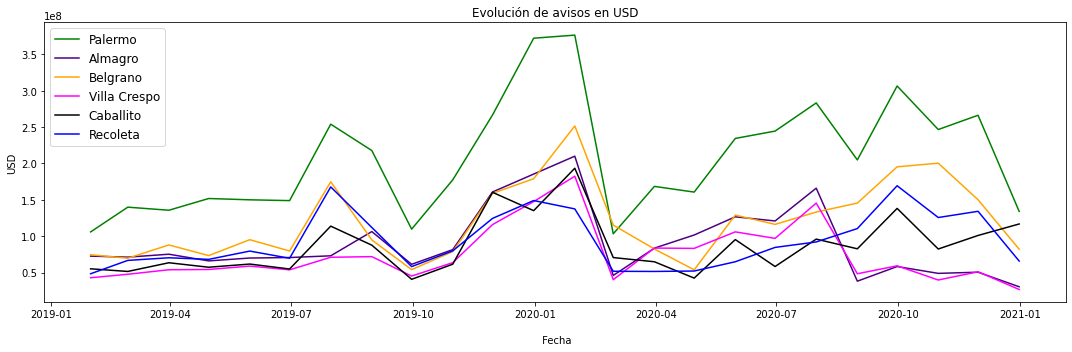

In [141]:
mensual_p =dataset_p.resample('M', on = 'fecha_creada').sum()
mensual_a =dataset_a.resample('M', on = 'fecha_creada').sum()
mensual_b =dataset_b.resample('M', on = 'fecha_creada').sum()
mensual_vc =dataset_vc.resample('M', on = 'fecha_creada').sum()
mensual_c =dataset_c.resample('M', on = 'fecha_creada').sum()
mensual_r =dataset_r.resample('M', on = 'fecha_creada').sum()

plt.figure(figsize=(15,5))
plt.plot(mensual_p.index, mensual_p.price, color='green', label='Palermo')
plt.plot(mensual_a.index, mensual_a.price, color='indigo',label='Almagro')
plt.plot(mensual_b.index, mensual_b.price, color='orange', label='Belgrano')
plt.plot(mensual_vc.index, mensual_vc.price, color='magenta',label='Villa Crespo')
plt.plot(mensual_c.index, mensual_c.price, color='black',label='Caballito')
plt.plot(mensual_r.index, mensual_r.price, color='blue',label='Recoleta')

plt.title ('Evolución de avisos en USD')
plt.xlabel('\n Fecha')
plt.ylabel('USD')

plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

En el gráfico se observa el impacto que tuvo la pandemia en todos los barrios. Absolutamente todos los barrios bajo análisis bajaron abruptamente en Marzo el monto publicado. Luego en el segundo semestre comenzó la recuperación, con Palermo a la cabeza. Los pisos en Palermos son los que más se han puesto en venta en proporción a otros barrios. Villa Crespo y Almagro mantuvieron en el último trimestre un número de publicaciones de propiedades en venta bajas.

Evidentemente sin más datos es difícil sacar conclusiones. No sabemos si la estrategia comercial de Properati cambió, lo que podría influenciar en los resultados. No sabemos si prioriza barrios, tipos de viviendas, alcance de su fuerza de ventas, etc. Esto sumado al comportamiento propio del mercado. 

En resumen, todos estos datos deberían ser analizados junto con otros datos más, como los internos de la empresa (ya explicados) y propios del mercado (tener datos de otras inmobiliarias) ya que no sabemos hasta el momento el porcentaje de penetración del mercado que tiene Properati. 